In [1]:
import pandas as pd
import numpy as np

#
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\user\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\msj.ttf',size=14)
sns.set(font=myfont.get_family())
sns.set_style({"font.sans-serif":['Microsoft JhengHei']})
style.use('fivethirtyeight')
#


In [73]:
train = pd.read_csv('clean_train.csv')
test = pd.read_csv('clean_test.csv')

In [75]:
concat = pd.concat([train, test], axis=0)

In [76]:
concat = pd.concat([concat.drop(cat,axis=1),concat[cat]],axis=1)

In [62]:
cat = ['sex','工作分類', '職等', '廠區代碼', '管理層級', '工作資歷1','工作資歷2','工作資歷3','工作資歷4','工作資歷5', '當前專案角色', '工作地點', '是否升遷', '婚姻狀況', '畢業科系類別']  

In [64]:
train = pd.concat([train.drop(cat,axis=1),train[cat]],axis=1)

In [3]:
train

,yyyy,PerNo,PerStatus,sex,工作分類,職等,廠區代碼,管理層級,工作資歷1,工作資歷2,...,年齡層級,婚姻狀況,年資層級A,年資層級B,年資層級C,任職前工作平均年數,畢業科系類別,眷屬量,通勤成本,歸屬部門
0,2014,1,0,1.0,1.0,3.0,19.0,4.0,0.0,1.0,...,6.0,1.0,2.0,1.0,1.0,2.0,5.0,0.0,8.0,19138.0
1,2015,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,7.0,1.0,2.0,2.0,1.0,2.0,5.0,2.0,8.0,19138.0
2,2016,1,0,1.0,1.0,3.0,19.0,6.0,0.0,1.0,...,7.0,1.0,2.0,2.0,1.0,2.0,5.0,2.0,8.0,19138.0
3,2014,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,...,9.0,1.0,5.0,5.0,0.0,0.0,1.0,2.0,8.0,8181.0
4,2015,3,0,0.0,1.0,4.0,8.0,1.0,0.0,0.0,...,10.0,1.0,6.0,6.0,0.0,0.0,1.0,2.0,8.0,8181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,2015,8769,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,...,2.0,2.0,1.0,1.0,0.0,0.0,8.0,1.0,8.0,8038.0
10661,2016,8769,1,1.0,1.0,7.0,8.0,1.0,0.0,0.0,...,3.0,2.0,1.0,1.0,0.0,0.0,8.0,1.0,8.0,8038.0
10662,2014,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,...,10.0,1.0,6.0,5.0,2.0,1.0,8.0,2.0,8.0,8012.0
10663,2015,8774,0,1.0,1.0,7.0,8.0,1.0,0.0,0.0,...,10.0,1.0,6.0,5.0,2.0,1.0,8.0,2.0,8.0,8012.0


In [4]:
train['歸屬部門'].value_counts()

2197.0     364
2058.0     330
14040.0    305
14077.0    266
8157.0     262
          ... 
16175.0      4
8104.0       4
11063.0      4
4190.0       2
14179.0      1
Name: 歸屬部門, Length: 113, dtype: int64

In [5]:
for col_n in train.columns[3:]:
    print(col_n)
    if len(train[col_n].value_counts().index) < 10:
        print(train[col_n].value_counts())
        
    else:
        print('too many class')


sex
1.0    7522
0.0    3143
Name: sex, dtype: int64
工作分類
1.0    9521
2.0    1144
Name: 工作分類, dtype: int64
職等
4.0    4431
7.0    2898
3.0    2244
2.0     748
1.0     273
5.0      33
8.0      19
6.0      19
Name: 職等, dtype: int64
廠區代碼
too many class
管理層級
1.0    8232
4.0    1288
6.0     677
2.0     182
3.0     164
5.0     122
Name: 管理層級, dtype: int64
工作資歷1
0.0    10347
1.0      318
Name: 工作資歷1, dtype: int64
工作資歷2
0.0    10109
1.0      556
Name: 工作資歷2, dtype: int64
工作資歷3
0.0    10005
1.0      660
Name: 工作資歷3, dtype: int64
工作資歷4
0.0    10047
1.0      618
Name: 工作資歷4, dtype: int64
工作資歷5
0.0    8165
1.0    2500
Name: 工作資歷5, dtype: int64
專案時數
too many class
專案總數
2.0    4201
1.0    3570
3.0    1985
4.0     640
5.0     191
6.0      59
7.0      15
8.0       4
Name: 專案總數, dtype: int64
當前專案角色
5.0    7899
1.0    2373
3.0     264
2.0     129
Name: 當前專案角色, dtype: int64
特殊專案佔比
too many class
工作地點
6.0     8283
5.0     1495
11.0     319
3.0      224
1.0      149
2.0      134
4.0       55
9.0        6
Nam

In [19]:
def distcat(df,group,colname):
    
    


    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[:2, :])
    ## Set the title. 
    ax1.set_title('All')
    plt.ylabel('Count', axes=ax1)

    ## plot the histogram. 
    sns.countplot(x=colname, data=df)

    ## Customizing the Box Plot. 
    ax2 = fig.add_subplot(grid[2:, :])
    ## Set title. 
    ax2.set_title('Group')
    plt.ylabel('Count', axes=ax2)

    ## plot the histogram. 
    sns.countplot(x=colname, hue=group, data=df)



    plt.show()


In [77]:
final_concat=pd.get_dummies(concat, columns=cat)

In [78]:
final_concat

,yyyy,PerNo,PerStatus,專案時數,專案總數,特殊專案佔比,訓練時數A,訓練時數B,訓練時數C,生產總額,...,婚姻狀況_3.0,畢業科系類別_1.0,畢業科系類別_2.0,畢業科系類別_3.0,畢業科系類別_4.0,畢業科系類別_5.0,畢業科系類別_6.0,畢業科系類別_7.0,畢業科系類別_8.0,畢業科系類別_9.0
0,2014,1,0,23.0,1.0,3.0,0.0,0.0,5.0,7.0,...,0,0,0,0,0,1,0,0,0,0
1,2015,1,0,23.0,2.0,1.0,0.0,0.0,8.0,9.0,...,0,0,0,0,0,1,0,0,0,0
2,2016,1,0,23.0,3.0,1.0,2.0,0.0,5.0,10.0,...,0,0,0,0,0,1,0,0,0,0
3,2014,3,0,23.0,4.0,1.0,0.0,0.0,1.0,8.0,...,0,1,0,0,0,0,0,0,0,0
4,2015,3,0,23.0,3.0,3.0,0.0,0.0,1.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,2017,8761,0,23.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3650,2017,8765,0,23.0,2.0,2.0,1.0,0.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
3651,2017,8767,0,23.0,3.0,1.0,0.0,0.0,0.0,6.0,...,0,0,0,0,0,0,0,1,0,0
3652,2017,8774,0,23.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
onehot_test = final_concat[final_concat.yyyy == 2017]
onehot_train = final_concat[final_concat.yyyy != 2017]

In [88]:
onehot_train

,yyyy,PerNo,PerStatus,專案時數,專案總數,特殊專案佔比,訓練時數A,訓練時數B,訓練時數C,生產總額,...,婚姻狀況_3.0,畢業科系類別_1.0,畢業科系類別_2.0,畢業科系類別_3.0,畢業科系類別_4.0,畢業科系類別_5.0,畢業科系類別_6.0,畢業科系類別_7.0,畢業科系類別_8.0,畢業科系類別_9.0
0,2014,1,0,23.0,1.0,3.0,0.0,0.0,5.0,7.0,...,0,0,0,0,0,1,0,0,0,0
1,2015,1,0,23.0,2.0,1.0,0.0,0.0,8.0,9.0,...,0,0,0,0,0,1,0,0,0,0
2,2016,1,0,23.0,3.0,1.0,2.0,0.0,5.0,10.0,...,0,0,0,0,0,1,0,0,0,0
3,2014,3,0,23.0,4.0,1.0,0.0,0.0,1.0,8.0,...,0,1,0,0,0,0,0,0,0,0
4,2015,3,0,23.0,3.0,3.0,0.0,0.0,1.0,6.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,2015,8769,0,24.0,2.0,2.0,2.0,0.0,4.0,11.0,...,0,0,0,0,0,0,0,0,1,0
10661,2016,8769,1,23.0,2.0,2.0,0.0,0.0,3.0,7.0,...,0,0,0,0,0,0,0,0,1,0
10662,2014,8774,0,23.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
10663,2015,8774,0,22.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,1,0


In [85]:
onehot_test.to_csv('onehot_test.csv',encoding='utf-8-sig', index=False)
onehot_train.to_csv('onehot_train.csv',encoding='utf-8-sig', index=False)

In [86]:
concat_del = final_concat.drop(delcol,axis=1)

In [87]:
onehot_del_test = concat_del[concat_del.yyyy == 2017]
onehot_del_train = concat_del[concat_del.yyyy != 2017]
onehot_del_test.to_csv('onehot_del_test.csv',encoding='utf-8-sig', index=False)
onehot_del_train.to_csv('onehot_del_train.csv',encoding='utf-8-sig', index=False)

In [70]:
len(cat)

15

In [71]:
delcol = ['sex_1.0','工作分類_2.0', '職等_8.0', '廠區代碼_20.0', '管理層級_6.0', '工作資歷1_1.0', '工作資歷2_1.0', '工作資歷3_1.0', 
'工作資歷4_1.0', '工作資歷5_1.0', '當前專案角色_5.0', '工作地點_11.0', '是否升遷_1.0', '婚姻狀況_3.0', '畢業科系類別_9.0']

In [72]:
len(delcol)

15

In [68]:
final_data.columns

Index(['yyyy', 'PerNo', 'PerStatus', '專案時數', '專案總數', '特殊專案佔比', '訓練時數A',
       '訓練時數B', '訓練時數C', '生產總額', '榮譽數', '升遷速度', '近三月請假數A', '近一年請假數A',
       '近三月請假數B', '近一年請假數B', '出差數A', '出差數B', '出差集中度', '年度績效等級A', '年度績效等級B',
       '年度績效等級C', '年齡層級', '年資層級A', '年資層級B', '年資層級C', '任職前工作平均年數', '眷屬量',
       '通勤成本', '歸屬部門', 'sex_0.0', 'sex_1.0', '工作分類_1.0', '工作分類_2.0', '職等_1.0',
       '職等_2.0', '職等_3.0', '職等_4.0', '職等_5.0', '職等_6.0', '職等_7.0', '職等_8.0',
       '廠區代碼_2.0', '廠區代碼_4.0', '廠區代碼_5.0', '廠區代碼_6.0', '廠區代碼_8.0', '廠區代碼_9.0',
       '廠區代碼_10.0', '廠區代碼_11.0', '廠區代碼_13.0', '廠區代碼_14.0', '廠區代碼_16.0',
       '廠區代碼_17.0', '廠區代碼_18.0', '廠區代碼_19.0', '廠區代碼_20.0', '管理層級_1.0',
       '管理層級_2.0', '管理層級_3.0', '管理層級_4.0', '管理層級_5.0', '管理層級_6.0', '工作資歷1_0.0',
       '工作資歷1_1.0', '工作資歷2_0.0', '工作資歷2_1.0', '工作資歷3_0.0', '工作資歷3_1.0',
       '工作資歷4_0.0', '工作資歷4_1.0', '工作資歷5_0.0', '工作資歷5_1.0', '當前專案角色_1.0',
       '當前專案角色_2.0', '當前專案角色_3.0', '當前專案角色_5.0', '工作地點_1.0', '工作地點_2.0',
       '工作地點_3.0', '工作地點_4.0', '工

In [58]:
tr

In [65]:
train 

,yyyy,PerNo,PerStatus,專案時數,專案總數,特殊專案佔比,訓練時數A,訓練時數B,訓練時數C,生產總額,...,工作資歷1,工作資歷2,工作資歷3,工作資歷4,工作資歷5,當前專案角色,工作地點,是否升遷,婚姻狀況,畢業科系類別
0,2014,1,0,23.0,1.0,3.0,0.0,0.0,5.0,7.0,...,0.0,1.0,1.0,0.0,0.0,1.0,6.0,1.0,1.0,5.0
1,2015,1,0,23.0,2.0,1.0,0.0,0.0,8.0,9.0,...,0.0,1.0,1.0,0.0,0.0,1.0,6.0,0.0,1.0,5.0
2,2016,1,0,23.0,3.0,1.0,2.0,0.0,5.0,10.0,...,0.0,1.0,1.0,0.0,0.0,5.0,6.0,0.0,1.0,5.0
3,2014,3,0,23.0,4.0,1.0,0.0,0.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,5.0,6.0,0.0,1.0,1.0
4,2015,3,0,23.0,3.0,3.0,0.0,0.0,1.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10660,2015,8769,0,24.0,2.0,2.0,2.0,0.0,4.0,11.0,...,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0,2.0,8.0
10661,2016,8769,1,23.0,2.0,2.0,0.0,0.0,3.0,7.0,...,0.0,0.0,0.0,0.0,1.0,5.0,6.0,0.0,2.0,8.0
10662,2014,8774,0,23.0,1.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,8.0
10663,2015,8774,0,22.0,1.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,1.0,8.0


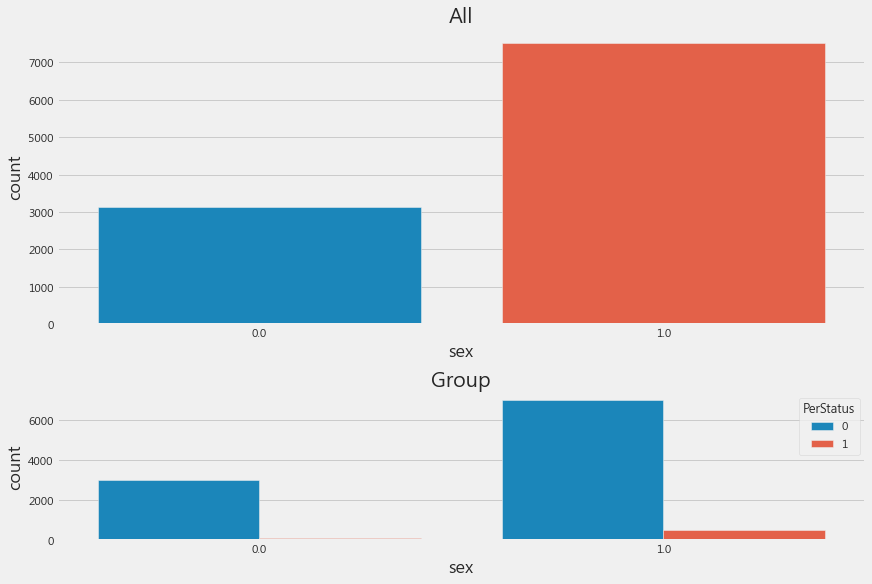

In [37]:
distcat(train,'PerStatus','sex')

In [ ]:
df_0 = df[df[group] == 0][colname]
df_1 = df[df[group] == 1][colname]

In [34]:
def distcon(df,group,colname):
    
    


    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[:2, :])
    ## Set the title. 
    ax1.set_title('All')

    ## plot the histogram. 
    sns.distplot(df[colname],hist=False, rug=True, label='0')

    ## Customizing the Box Plot. 
    ax2 = fig.add_subplot(grid[2:, :])
    ## Set title. 
    ax2.set_title('Group')

    ## plot the histogram. 
    sns.distplot(df[df[group]== 0][colname],hist=False, rug=True, label='0')
    sns.distplot(df[df[group]== 1][colname],hist=False, rug=True, label='1')


    plt.legend()
    plt.show()


In [ ]:
專案總數  訓練時數A~c 生產總額  榮譽數
升遷速度  >>> 連續
近三月請假數A   >>> 連續
近一年請假數A   >>> 連續
近三月請假數B   >>> 連續
近一年請假數B   >>> 連續
出差數A >>> 連續
出差數B >>> 連續
出差集中度 >>> 連續
年度績效等級A >>> 連續
年度績效等級B >>> 連續
年度績效等級C >>> 連續
年齡層級 >>> 連續
年資層級A  >>> 連續
年資層級B >>> 連續
年資層級C >>> 連續
任職前工作平均年數 >>> 連續
眷屬量 >>> 連續
通勤成本 >>> 連續

C:\Users\user\anaconda3\envs\imbd2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\imbd2020\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\imbd2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)

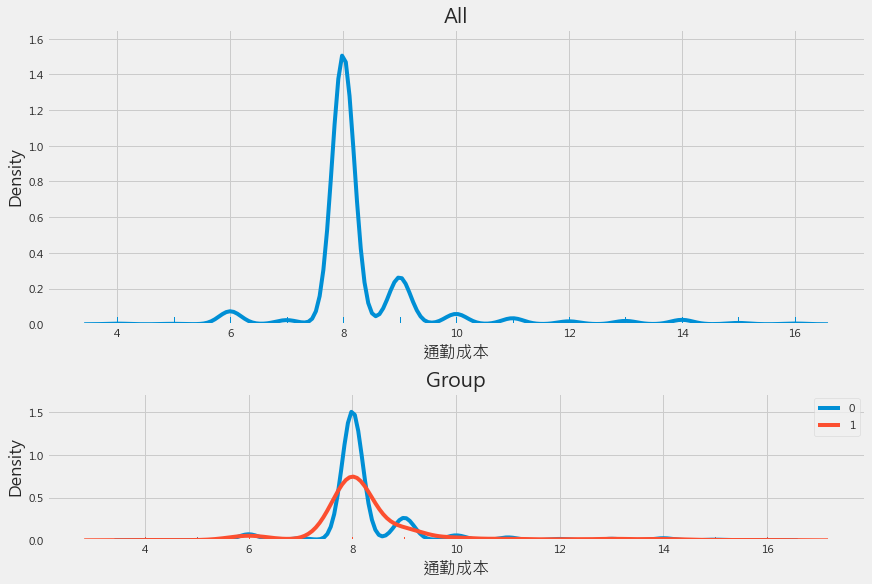

In [57]:
distcon(train,'PerStatus','通勤成本')